**Grupo:**
* Vildoso Flores Dario Alejandro
* De La Torre Zelaya Daniel German

# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [1]:
import os

import numpy as np

from matplotlib import pyplot

from scipy import optimize

import pandas as pd

%matplotlib inline

## Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir si un estudiante será admitido en una universidad. Suponga que es el administrador de un departamento universitario y desea determinar las posibilidades de admisión de cada solicitante en función de sus resultados en dos exámenes. Tiene datos históricos de solicitantes anteriores que puede usar como un conjunto de capacitación para la regresión logística. Para cada ejemplo de capacitación, se tiene las calificaciones del solicitante en dos exámenes y la decisión de admisión. Su tarea es crear un modelo de clasificación que calcule la probabilidad de admisión de un solicitante en función de los puntajes de esos dos exámenes.

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [2]:
# Cargar datos utilizando la libreria pandas
# Las columnas son de el numero de embarazos, glucosa, presion de sangre, grosor de piel en triceps, insulina, indice de masa corporal, funcion del pedigri de diabetes y edad
# contiene la etiqueta que indica si el paciente fue diagnosticado con diabetes
datos = pd.read_csv('DatosDiabetes.csv')
data = datos.values
datos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [3]:
y = data[:, 8]
pd.DataFrame(y)

,0
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
1995,0.0
1996,1.0
1997,0.0
1998,1.0


In [4]:
# Funcion de normalizacion para las columnas
def featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [5]:
X, mu, sigma = featureNormalize(datos.values[:, :8])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,-0.515394,0.524553,-0.372481,0.873645,-0.722016,0.172683,-1.063246,1.180424
1,-1.120495,-1.159756,0.670080,0.625186,0.402563,0.737249,-0.735551,-0.856326
2,-1.120495,0.742890,-3.604422,-1.300374,-0.722016,1.473638,0.491759,-0.177409
3,-1.120495,0.430980,-0.059713,1.308449,1.527142,1.240448,-0.327478,-0.771462
4,-0.817945,0.555744,-0.372481,1.246334,3.596367,1.044077,0.201161,-1.026055
...,...,...,...,...,...,...,...,...
1995,-0.515394,-1.440474,-0.268225,0.190382,-0.227201,-0.305970,-0.312021,-0.007680
1996,1.299907,1.803381,0.148800,1.308449,0.447546,0.062225,0.766899,0.246914
1997,0.694807,-1.128565,0.461568,-1.300374,-0.722016,-0.121872,-0.274924,0.756101
1998,-1.120495,0.243835,2.129667,1.556908,0.447546,4.284191,-0.469686,-0.601732


<a id="section1"></a>
### Implementacion

#### Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$.

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [6]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [7]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


<a id="section2"></a>
#### Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [8]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,1.0,-0.515394,0.524553,-0.372481,0.873645,-0.722016,0.172683,-1.063246,1.180424
1,1.0,-1.120495,-1.159756,0.670080,0.625186,0.402563,0.737249,-0.735551,-0.856326
2,1.0,-1.120495,0.742890,-3.604422,-1.300374,-0.722016,1.473638,0.491759,-0.177409
3,1.0,-1.120495,0.430980,-0.059713,1.308449,1.527142,1.240448,-0.327478,-0.771462
4,1.0,-0.817945,0.555744,-0.372481,1.246334,3.596367,1.044077,0.201161,-1.026055
...,...,...,...,...,...,...,...,...,...
1995,1.0,-0.515394,-1.440474,-0.268225,0.190382,-0.227201,-0.305970,-0.312021,-0.007680
1996,1.0,1.299907,1.803381,0.148800,1.308449,0.447546,0.062225,0.766899,0.246914
1997,1.0,0.694807,-1.128565,0.461568,-1.300374,-0.722016,-0.121872,-0.274924,0.756101
1998,1.0,-1.120495,0.243835,2.129667,1.556908,0.447546,4.284191,-0.469686,-0.601732


La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

In [9]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [10]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.87971698  0.4082322   1.06593822 -0.18096292  0.00384399 -0.12762893
  0.62672543  0.28393866  0.16147323]


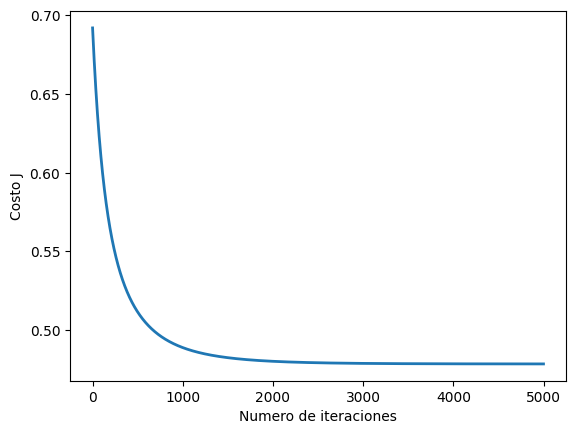

In [11]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [12]:
# verificar si tiene o no Diabetes
X_array = [1, 2,	108,	70,	30,	0,	40,	0.53,	54] # Datos de Prueba
X_array[1:] = (X_array[1:] - mu) / sigma
prueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('Paciente diagnosticado (usando el descenso por el gradiente): {:.0f}'.format(prueba))

Paciente diagnosticado (usando el descenso por el gradiente): 0


In [13]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [14]:
cost, grad = costFunction(np.zeros(9), X, y)
cost, grad

(np.float64(0.6931471805599453),
 array([ 0.158     , -0.10646833, -0.21746571, -0.03603296, -0.03607194,
        -0.0573637 , -0.13127295, -0.07374661, -0.11219516]))

In [15]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))



[0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
[ 0.158      -0.10646833 -0.21746571 -0.03603296 -0.03607194 -0.0573637
 -0.13127295 -0.07374661 -0.11219516]
Gradiente en theta inicial (zeros):
	[0.1580, -0.1065, -0.2175, -0.0360, -0.0361, -0.0574, -0.1313, -0.0737, -0.1122]


#### Parámetros de aprendizaje usando `scipy.optimize`

En el codigo anterior se encontró los parámetros óptimos de un modelo de regresión lineal al implementar el descenso de gradiente. Se implemento una función de costo y se calculó su gradiente, utilizando el algoritmo del descenso por el gradiente.

En lugar de realizar los pasos del descenso por el gradiente, se utilizará el [módulo `scipy.optimize`] (https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy es una biblioteca de computación numérica para `python`. Proporciona un módulo de optimización para la búsqueda y minimización de raíces. A partir de `scipy 1.0`, la función` scipy.optimize.minimize` es el método a utilizar para problemas de optimización (tanto restringidos como no restringidos).

For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to `optimize.minimize` the following inputs:

Para la regresión logística, se desea optimizar la función de costo $J(\theta)$ con los parámetros $\theta$.
Concretamente, se va a utilizar `optimize.minimize` para encontrar los mejores parámetros $\theta$ para la función de costo de regresión logística, dado un dataset fijo (de valores X e y). Se pasara a `optimize.minimize` las siguientes entradas:

- `costFunction`: Una función de costo que, cuando se le da el dataset de entrenamiento y un $\theta$ particular, calcula el costo de regresión logística y el gradiente con respecto a $\theta$ para el dataset(X, y). Es importante tener en cuenta que solo se pasa el nombre de la función sin el paréntesis. Esto indica que solo proporcionamos una referencia a esta función y no evaluamos el resultado de esta función.
- `initial_theta`: Los valores iniciales de los parametros que se tratan de optimizar.
- `(X, y)`: Estos son argumentos adicionales a la funcion de costo.
- `jac`: Indicación si la función de costo devuelve el jacobiano (gradiente) junto con el valor de costo. (True)
- `method`: Método / algoritmo de optimización a utilizar
- `options`: Opciones adicionales que pueden ser específicas del método de optimización específico. Solo se indica al algoritmo el número máximo de iteraciones antes de que termine.

Si se ha completado la `costFunction` correctamente,`optimize.minimize` convergerá en los parámetros de optimización correctos y devolverá los valores finales del costo y $\theta$ en un objeto de clase.

Al usar `optimize.minimize`, no se tuvo que escribir ningún bucle ni establecer una tasa de aprendizaje como se hizo para el descenso de gradientes. Todo esto se hace mediante `optimize.minimize`: solo se necesita proporcionar una función que calcule el costo y el gradiente.

A continuación, se tiene el código para llamar a `optimize.minimize` con los argumentos correctos.

In [16]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*theta))

Costo con un valor de theta encontrado por optimize.minimize: 0.479
theta:
	[-0.885, 0.418, 1.081, -0.185, 0.008, -0.138, 0.632, 0.287, 0.152]


C:\Users\GERMAN ZELAYA\AppData\Local\Temp\ipykernel_18740\1628533777.py:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,
